### **Machine Learning with Python: An Introduction**

#### **Lessons**
1. Lesson 1: **Python Ecosystem for Machine Learning**
2. Lesson 2: **Python and SciPy**
3. Lesson 3: **Load Datasets from CSV**
4. Lesson 4: **Analyze Data**
    * Understand Data with Descriptive Statistics
    * Understand Data with Visualization
5. Lesson 5: **Prepare Data**
    * Pre-Process Data
    * Feature Selection
6. Lesson 6: **Evaluate Algorithms**
    * Resampling Methods
    * Algorithm Evaluation Metrics
    * Spot-Check Classification Algorithms
    * Spot-Check Regression Algorithms
    * Model Selection
    * Pipelines
7. Lesson 7: **Improve Results**
    * Ensemble Methods
    * Algorithm Parameter Tuning
8. Lesson 8: **Present Results**
    * Model Finalization

#### **Lesson 1: Python Ecosystem for Machine Learning**
**1.1 Python:** Python is a dynamic language, widely used for machine learning and data science because of the excellent library
support. Both useful for research and development and production of systems.

**1.2 SciPy:** SciPy is an ecosystem of Python libraries for mathematics, science and engineering. The ecosystem is comprised of:
* `NumPy:` to efficiently work with data in arrays.
* `Matplotlib:` to create 2D charts and plots from data.
* `Pandas:` to load, organize and analyze the data.

**1.3 Scikit-Learn** It is build upon and requires the SciPy ecosystem. The focus of the scikit-learn library is machine learning algorithms for classification, regression, clustering and so on. It also provides tools for related tasks such as - evaluating models, tuning parameters and pre-processing data.

**1.4 Installing the Ecosystem** [For Windows]
* Python: Download python exe file for your windows (update version is better), install it on your machine, add the path in enviromnet variable.
* SciPy: `pip install scipy`
* Numpy: `pip install numpy`
* Matplotlib: `pip install matplotlib`
* Pandas: `pip install pandas`

Once installed, we can confirm that the installation was successful. To check the installation - open any python code editor and run the following codes:

In [1]:
# Check whether they are installed and version
import sys
print(f"Python      : {sys.version}")

import scipy
print(f"Scipy       : {scipy.__version__}")

import numpy
print(f"Numpy       : {numpy.__version__}")

import matplotlib
print(f"Matplotlib  : {matplotlib.__version__}")

import pandas
print(f"Pandas      : {pandas.__version__}")

import sklearn
print(f"Scikit-Learn: {sklearn.__version__}")

Python      : 3.11.4 (tags/v3.11.4:d2340ef, Jun  7 2023, 05:45:37) [MSC v.1934 64 bit (AMD64)]
Scipy       : 1.14.0
Numpy       : 1.26.4
Matplotlib  : 3.9.0
Pandas      : 2.2.2
Scikit-Learn: 1.5.1


#### **Lesson 2: Python and SciPy**
This section is basically for Python and SciPy Libraries (Numpy, Matplotlib, Pandas) crash course. We assume that we know the basics of -
* Coding in Python
* Numpy basics - numpy structure and operations
* Matplotlib basics - plotting using pyplot
* Pandas basics - load, manipulate of dataframe

#### **Lesson 3: Load Datasets from CSV**
The most common format for machine learning data is `csv (comma separated values)` file. Before loading csv data we have to consider some parameters of csv file.
1. **`File Header:`** If the data have a file header it can help assigning names automatically to each column of data. But if not, we need to name the attributes manually.
2. **`Comments:`** Comments in a csv file are indicated by a hash (#) at the start of a line. If comments exist in data, we may need to indicate whether or not to expect comments and the character that indicates the comment line.
3. **`Delimiter:`** In csv file the common seperator is the comma (,). In some cases the data file may use a different delimiter like- tab or white-space in which we must specify the separator explicitely.
4. **`Quotes:`** Sometimes the field values may contain spaces and they will be quated using double quotation (""), the default quote character. Other characters may be used, and we must specify them in the file.

**Pima Indians Dataset**

To demonstrate data loading here we will use the 'Pima Indians' dataset. The dataset is good for demonstration because all the attributes are numeric and the output variable is binary (0 or 1), hence it is a classification problem. The dataset is available in the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes).

##### **3.1 Load CSV file with Python Standard Library**

It uses an object that can iterate over each row of the dataset and then convert them into numpy array which makes a dataset of numpy array type.

In [6]:
# Load CSV file (using Python Standard Library)
import csv
import numpy as np
filepath = "F:/courses/mlds_nactar/dataset/pima_indians_diabetes.csv"
with open(filepath, 'r') as raw_data:
    reader = csv.reader(raw_data, delimiter=',', quoting=csv.QUOTE_NONE)
    header = next(reader)  # Skip the header row
    x = list(reader)

data = np.array(x).astype(float)
print(data.shape)

(768, 9)


##### **3.2 Load CSV file with Numpy**

Numpy uses 'numpy.loadtxt()' function that assumes no header row and all the data has the same format. It can also load dataset directly from the url.

In [7]:
# Load CSV using Numpy
import numpy as np
filepath = "F:/courses/mlds_nactar/dataset/pima_indians_diabetes.csv"
raw_data = open(filepath, 'rb')
#data = np.loadtxt(raw_data, delimiter=',')
data = np.genfromtxt(filepath, delimiter=',', skip_header=1)    # If there is headers
print(data.shape)

(768, 9)


In [ ]:
# Load CSV from URL using NumPy
import numpy as np
from urllib import urlopen
url = 'https://goo.gl/vhm1eU'   # Url of pima_indians_diabetes dataset
raw_data = urlopen(url)
dataset = np.loadtxt(raw_data, delimiter=",")
print(dataset.shape)


##### **3.3 Load CSV File with Pandas**
Pandas uses the 'pandas.read_csv()' function to load the dataset which is very flexible and the most recommended approach for loading machine learning data. The function returns a Dataframe which is helpful in summarizing and plotting data. This can also load data directly fron url.

In [9]:
# Load local csv Data using Pandas
import pandas as pd
filepath = "F:/courses/mlds_nactar/dataset/pima_indians_diabetes.csv"
data = pd.read_csv(filepath)
print(data.shape)

(768, 9)


In [ ]:
# Load csv Data using Pandas from URL
import pandas as pd
url = 'https://goo.gl/vhm1eU/'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']    # Explicitely specify the column names
data = pd.read_csv(url, names=names)
print(data.shape)

#### **Lesson 4: Analyze Data**

##### **4.1 Undestand Data with Descriptive Statistics**
To get the best result we have to understand the data. To better understand the machine learning data, we will follow 7 recipes and through our journey of understanding data, we will use the 'Pima Indians Diabetes' dataset.

**4.1.1. Take a Peek at Raw Data**

Looking at the raw data can reveal insights of the data and grow ideas on how to better pre-process and handle the data for our machine learning tasks.

In [17]:
# Take a Look at Data
import pandas as pd
pd.set_option('display.width', 200)

filepath = "F:/courses/mlds_nactar/dataset/pima_indians_diabetes.csv"
data = pd.read_csv(filepath)
print(data.head())      # Displays the first 5 items by default, we can also specify the item number - 'data.head(10)'
print(data.tail())      # Displays the last 5 items by default

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72             35        0  33.6                     0.627   50        1
1            1       85             66             29        0  26.6                     0.351   31        0
2            8      183             64              0        0  23.3                     0.672   32        1
3            1       89             66             23       94  28.1                     0.167   21        0
4            0      137             40             35      168  43.1                     2.288   33        1
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome
763           10      101             76             48      180  32.9                     0.171   63        0
764            2      122             70             27        0  36.8                     0.340   27        0
765          

**4.1.2. Dimensions of the Data**

Dimension means how many rows and columns are there in the dataset. It is important to know the dimension of the data because by this we can realize two things:
* Too many rows may take too long to train the algorithms and too few rows perhaps we do not have enough data to train the algorithms.
* Too many features (columns) and few instances (rows) can suffer poor performance due to the curse of dimensionality.

[NB] The 'Pima Indinas Diabetes' dataset has 768 rows and 9 columns. The `shape` property results in rows then columns (rows, columns).

In [18]:
# Shape of the Data
import pandas as pd
filepath = "F:/courses/mlds_nactar/dataset/pima_indians_diabetes.csv"
data = pd.read_csv(filepath)
print(data.shape)

(768, 9)


**4.1.3. Data Type of Each Attribute**

Knowing data type of each attribute is necessary because to train the algorithms on data we need the data in integer or floating point values. So, Strings, Categorical or Ordinal values need to be converted into floating point or integer value. We can get an idea while taking a look at data but we also can explicitely check the data type of the attributes.

In [19]:
# Types of the Data
import pandas as pd
filepath = "F:/courses/mlds_nactar/dataset/pima_indians_diabetes.csv"
data = pd.read_csv(filepath)
print(data.dtypes)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


**4.1.4. Descriptive Statistics**

Descriptive statistics gives a great insights like - 'Total Instances', 'Are there any missing values', 'Central Tendency', 'Range', 'Dispersion' of data of each attribute. The pandas `describe()` function lists 8 statistical properties of each attribute:
* `Count`: Total number of instances
* `Mean`: Average value of instances
* `Standard Deviation`: 
* `Minimum Value`: Lowest value among instances
* `25th Percentile`: 
* `50th Percentile (Median)`: Middle value among instances
* `75th Percentile`: 
* `Maximum Value`: Highest value among instances

In [11]:
# Types of the Data
import pandas as pd
pd.set_option('display.width', 200)
pd.set_option('display.precision', 2)

filepath = "F:/courses/mlds_nactar/dataset/pima_indians_diabetes.csv"
data = pd.read_csv(filepath)
print(data.describe())

       Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin     BMI  DiabetesPedigreeFunction     Age  Outcome
count       768.00   768.00         768.00         768.00   768.00  768.00                    768.00  768.00   768.00
mean          3.85   120.89          69.11          20.54    79.80   31.99                      0.47   33.24     0.35
std           3.37    31.97          19.36          15.95   115.24    7.88                      0.33   11.76     0.48
min           0.00     0.00           0.00           0.00     0.00    0.00                      0.08   21.00     0.00
25%           1.00    99.00          62.00           0.00     0.00   27.30                      0.24   24.00     0.00
50%           3.00   117.00          72.00          23.00    30.50   32.00                      0.37   29.00     0.00
75%           6.00   140.25          80.00          32.00   127.25   36.60                      0.63   41.00     1.00
max          17.00   199.00         122.00          99.0

**4.1.5. Class Distribution (for Classification only)**

Class distribution means - how many instances are in each class. On classification problem we need to know how balanced the class distribution is. Highly imbalanced dataset is common and may need special handling in data pre-processing. 'Pima Indians Diabetes' dataset is a binary classification problem having 500 instances in class 0 and 268 instances in class 1. (0 = No Diabetes, 1 = Diabetes)

In [23]:
# Types of the Data
import pandas as pd
filepath = "F:/courses/mlds_nactar/dataset/pima_indians_diabetes.csv"
data = pd.read_csv(filepath)
class_counts = data.groupby('Outcome').size()
print(class_counts)

Outcome
0    500
1    268
dtype: int64


**4.1.6. Correlation Between Attributes**

Correlation refers to the relationship between two attributes and how they may or may not change together. Pearson's Correlation Coefficient, the most comonly used method, describes correlation between two attributes by -1 or 1 means a full negetive or positive correlation respectively and 0 shows no correlation at all. `Highly correlated attributes can cause poor performance in linear or logistic regression.`

The pandas 'corr()' function lists all attributes across the top and down and give correlation coefficient between all pairs of attributes. The diagonal line through the matrix shows perfect correlation of each attribute with itself.

In [12]:
# Types of the Data
import pandas as pd
pd.set_option('display.width', 200)
pd.set_option('display.precision', 2)

filepath = "F:/courses/mlds_nactar/dataset/pima_indians_diabetes.csv"
data = pd.read_csv(filepath)
correlations = data.corr(method='pearson')
print(correlations)

                          Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction   Age  Outcome
Pregnancies                      1.00     0.13           0.14          -0.08    -0.07  0.02                     -0.03  0.54     0.22
Glucose                          0.13     1.00           0.15           0.06     0.33  0.22                      0.14  0.26     0.47
BloodPressure                    0.14     0.15           1.00           0.21     0.09  0.28                      0.04  0.24     0.07
SkinThickness                   -0.08     0.06           0.21           1.00     0.44  0.39                      0.18 -0.11     0.07
Insulin                         -0.07     0.33           0.09           0.44     1.00  0.20                      0.19 -0.04     0.13
BMI                              0.02     0.22           0.28           0.39     0.20  1.00                      0.14  0.04     0.29
DiabetesPedigreeFunction        -0.03     0.14           0.04        

**4.1.7. Skew of Univariate Distribution**

Many Machine Learning algorithms assume that the data has a `Gaussion` distribution, because it is preferred for better result. Skew refers to a distribution, which is assumed Gaussian (Normal or Bell Curve), that is shifted or squashed in one direction or another. Knowing that an attribute has a skew allow us to perform data preparation to correct the skew to improve accouracy of the models.

Pandas `skew()` function shows a positive (right) or negetive (left) skew. Values closer to zero shows less skew.

In [2]:
# Types of the Data
import pandas as pd

filepath = "F:/courses/mlds_nactar/dataset/pima_indians_diabetes.csv"
data = pd.read_csv(filepath)
skew = data.skew()
print(skew)

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64


##### **4.2 Undestand Data with Visualization**
The fastest way to learn about data is to use data visualization. Using python pandas is a best way of visualizing machine learning data. Here, we also use 'Pima Indians Diabetes' dataset to explore the recipies of pandas data visualization.

**4.2.1 Univariate Plots**

Univariate plots are used to understand each attribute independently of a dataset. In this section we will look at three univariate visualization techniques to understand seperate attribute of 'Pima Indians Diabetes' dataset.

`Histogram`

Histograms groups data into bins and provide a count of the obserbations in each bin. From the shape of the bins we can quickly get an idea whether an attribute is Gaussian, skewed or even has as exponential distribution, also help to see possible outliers.

<Figure size 1400x800 with 0 Axes>

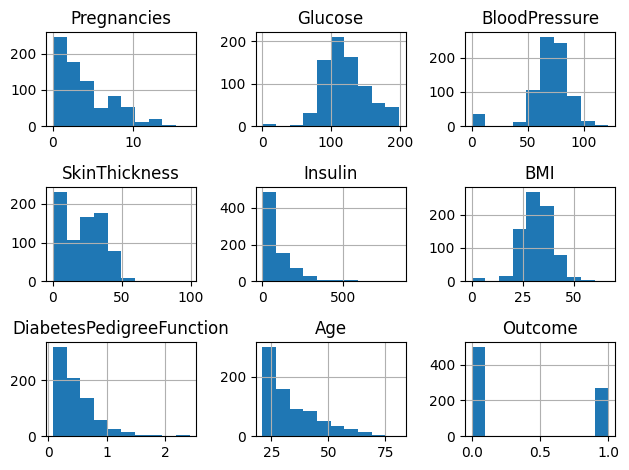

In [21]:
# Histogram Analysis
import pandas as pd
import matplotlib.pyplot as plt

filepath = "F:/courses/mlds_nactar/dataset/pima_indians_diabetes.csv"
data = pd.read_csv(filepath)
#plt.figure(figsize=(8, 8))
data.hist()
plt.tight_layout()
plt.show()

[NB] We can see that the attributes `Pregnancies`, `DiabetesPedigreeFunction`, `Insulin` and `Age` may have an exponential distribution, `Glucose`, `BloodPressure` and `BMI` may have a Gaussian or nearly Gausian distribution.

`Density Plots`

The density plots look like an abstracted histogram with a smooth curve drawn through the top of the each bin.

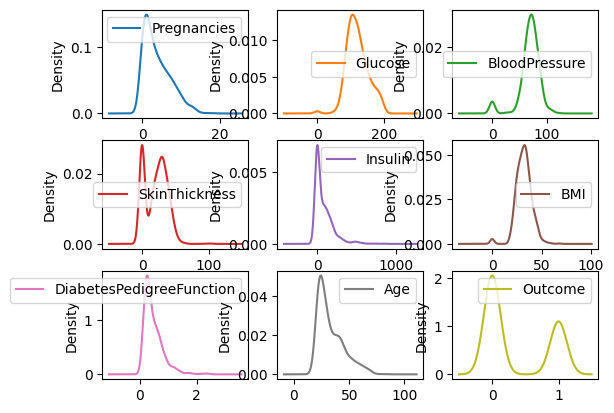

In [24]:
# Density Plots
import pandas as pd
import matplotlib.pyplot as plt

filepath = "F:/courses/mlds_nactar/dataset/pima_indians_diabetes.csv"
data = pd.read_csv(filepath)
data.plot(kind='density', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

`Box and Whisker Plots`

Boxplots summarize the distribution of each attribute, draw a line for the median (middle value) and a box around the 25th and 75th percentiles (the middle 50% of the data). The whiskers give an idea of the spread of the data and dots outside of the whiskers show the outlier values (values that are 1.5 times greater than the size of the spread of the middle 50% of the data).

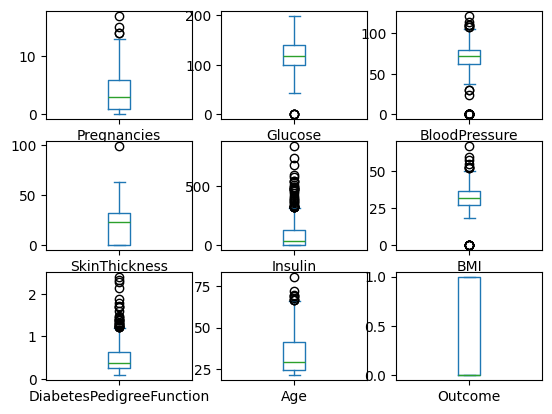

In [25]:
# Histogram Analysis
import pandas as pd
import matplotlib.pyplot as plt

filepath = "F:/courses/mlds_nactar/dataset/pima_indians_diabetes.csv"
data = pd.read_csv(filepath)
data.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

**4.2.2 Multivariate Plots**

Multivariate plots show the interections between multiple variables in the dataset. In this section we will explore two multivariate plot examples to demstrate the relationship among variables.

`Correlation Matrix Plot`

Correlation gives the indication of how the relationship between two variables changes. If two variables change in the same direction they are positively correlated and if they change in opposite directions together (means- one goes up and one goes down), then they are negatively correlated. The calculation of the correlation between each pair of attributes is called correlation matrix. We can plot the correlation matrix and get an idea of which variables have high correlation with each other.

[NB] Highly correlated variables in data may lead to poor performance in some ml algorithms like - linear and logistic regression.

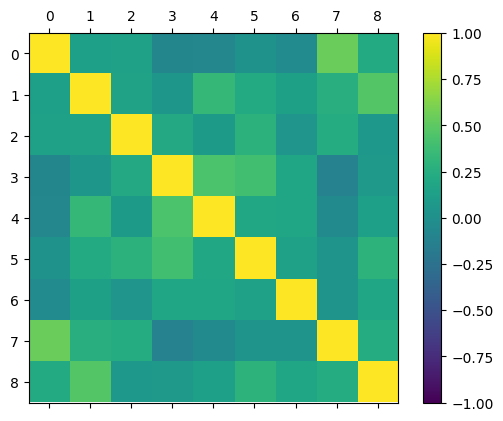

In [3]:
# Correlation Matrix Plot
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

filepath = "F:/courses/mlds_nactar/dataset/pima_indians_diabetes.csv"
data = pd.read_csv(filepath)
correlations = data.corr()

# Plot Correlation Matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
# ticks = np.arange(0,9,1)
# ax.set_xticks(ticks)
# ax.set_yticks(ticks)
plt.show()

`Scatter Plot Matrix`

A scatter plot shows the relationship between two variables as dots in two dimensions, one axis for each attribute. Drawing all the scatter plots of all pair of attributes is called scatter plot matrix. Scatter plot summarizes the relationships with a line, so we can spot the structured relationships that are correlated and good candidates for removal from the dataset.

The scatter plot of each variable with itself, the diagonal, shows histograms of each attribute.

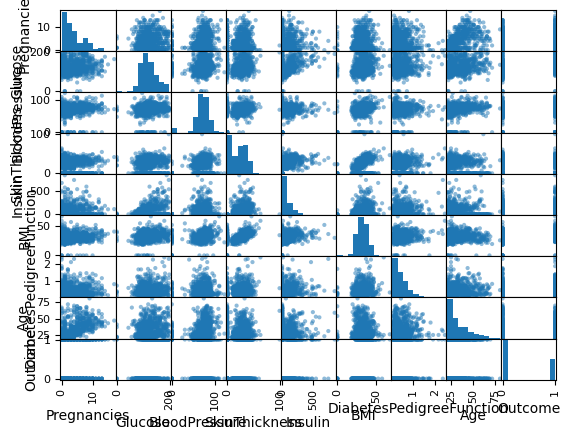

In [6]:
# Scatter Plot Matrix
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

filepath = "F:/courses/mlds_nactar/dataset/pima_indians_diabetes.csv"
data = pd.read_csv(filepath)
correlations = data.corr()
scatter_matrix(data)
plt.show()

#### **Lesson 5: Prepare Data**

##### **5.1 Preprocess Data**
To get the best performance of the machine learning algorithms, it is ideal to prepare the data we intend to use in such a way that best expose the staructure of the problem. In this lesson, we will explore some scikit-learn pre-processing techniques for machine learning analysis.

`Need for Data Pre-Processing`: A difficulty is that different algorithms make different assumptions about the data and they need different transformations. Also, sometimes algorithms can deliver better results without pre-processing. So, it is recommended creating many different views and transforms of the data, then exercixe a handful of algorithms on each view of the dataset. This will help to understand which data transforms might be better at exposing the structure of the problem in general.

The Data Preprocessing combines 4 different recipies for machine learning tasks. For example we will use the 'Pima Indians Diabetes' dataset to explore and understand all the pre-processing recipies, each recipe follows the same structure:
1. Load the data
2. Split tha dataset into input and output variables
3. Apply a pre-processing transform to the input variables
4. Summarize the data to see the change

`Data Transforms`: The main purpose of transform is to make data ready for ml algorithms. The scikit-learn library provides two different techniques for transforming data, each are useful in different circumstances.
1. **Fit and Multiple Transform:** [It is the preferred approach] The `fit()` function is to prepare the parameters of the transform once on the data. Then later we can use the `transform()` function on the same data to prepare it for modeling and on the test data for evaluating.
2. **Combined Fit-And-Transform:** It is convenient if we are interested in plotting or summarizing the transformed data.

Now let's explore the scikit-learn data preprocessing techniques -

**5.1.1 Rescale Data**

Rescale is making all the values of different scales into a same range. When the data is comprised of attributes with varying scales, they are often rescaled into the range between 0 and 1, also reffered to as normalization. This is useful for optimizing core machine learning algorithms like gradient discent, algorithms that weight inputs like regression and neural networks and algorithms that use distance measures like k_Nearest Neighbors.

To rescale our pima-indians-diabetes data, here we will use scikit-learn's `MinMaxScaler` class.

In [10]:
# Rescale Data (0 - 1)
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

filepath = "F:/courses/mlds_nactar/dataset/pima_indians_diabetes.csv"
data = pd.read_csv(filepath)
array = data.values
# Seperate array into input and output components
x = array[:,:-1]
y = array[:,-1]
scaler = MinMaxScaler(feature_range=(0,1))
rescaled_x = scaler.fit_transform(x)
np.set_printoptions(precision=2)
print(rescaled_x[0:5,:])

[[0.35 0.74 0.59 0.35 0.   0.5  0.23 0.48]
 [0.06 0.43 0.54 0.29 0.   0.4  0.12 0.17]
 [0.47 0.92 0.52 0.   0.   0.35 0.25 0.18]
 [0.06 0.45 0.54 0.23 0.11 0.42 0.04 0.  ]
 [0.   0.69 0.33 0.35 0.2  0.64 0.94 0.2 ]]


**5.1.2 Standardize Data**

Standardization basically scale the data following the standard gausian distribution where the mean is 0 and the standard deviation is 1. The algorithms which assume that the input variables follow a Gausian distribution, standardization is suitable for them such as linear and logistic regression, linear discriminant analysis etc.

Scikit-learn has a class named `StandardScaler` for standardization.

In [13]:
# Standardize Data (mean=0, std=1)
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

filepath = "F:/courses/mlds_nactar/dataset/pima_indians_diabetes.csv"
data = pd.read_csv(filepath)
array = data.values
# Seperate array into input and output components
x = array[:,:-1]
y = array[:,-1]
scaler = StandardScaler().fit(x)
standardized_x = scaler.transform(x)
np.set_printoptions(precision=2)
print(standardized_x[0:5,:])

[[ 0.64  0.85  0.15  0.91 -0.69  0.2   0.47  1.43]
 [-0.84 -1.12 -0.16  0.53 -0.69 -0.68 -0.37 -0.19]
 [ 1.23  1.94 -0.26 -1.29 -0.69 -1.1   0.6  -0.11]
 [-0.84 -1.   -0.16  0.15  0.12 -0.49 -0.92 -1.04]
 [-1.14  0.5  -1.5   0.91  0.77  1.41  5.48 -0.02]]


**5.1.3 Normalize Data**

Normalizing in scikit-learn refers to rescaling each observation (row) to have a length of 1 (aka a unit norm or a vector with the length of 1 in linear algebra). Normalization is useful for sparse datasets (lots of zeros), datasets having attributes of varying scales, using algorithms taht weight input values like neural networks and algorithms that use distance measures such as k-Nearest Neighbours.

Scikit-learn has `Normalizer` class.

In [1]:
# Normalize Data (mean=0, std=1)
import pandas as pd
import numpy as np
from sklearn.preprocessing import Normalizer

filepath = "F:/courses/mlds_nactar/dataset/pima_indians_diabetes.csv"
data = pd.read_csv(filepath)
array = data.values
# Seperate array into input and output components
x = array[:,:-1]
y = array[:,-1]
scaler = Normalizer().fit(x)
normalized_x = scaler.transform(x)
np.set_printoptions(precision=2)
print(normalized_x[0:5,:])

[[0.03 0.83 0.4  0.2  0.   0.19 0.   0.28]
 [0.01 0.72 0.56 0.24 0.   0.22 0.   0.26]
 [0.04 0.92 0.32 0.   0.   0.12 0.   0.16]
 [0.01 0.59 0.44 0.15 0.62 0.19 0.   0.14]
 [0.   0.6  0.17 0.15 0.73 0.19 0.01 0.14]]


**5.1.3 Binarize Data [Make Binary]**

Binarize specify a binary threshold value to transform values above the threshold as 1 and equal to or below as 0, also called `Thresholding`. It can be useful when we have probabilities and we want to make values crisp, also useful for feature engineering and we want to add new features that indicate something meaningful.

We can create new binary attributes using ccikit-learn `Binarizer` class.

In [2]:
# Binarize Data (mean=0, std=1)
import pandas as pd
import numpy as np
from sklearn.preprocessing import Binarizer

filepath = "F:/courses/mlds_nactar/dataset/pima_indians_diabetes.csv"
data = pd.read_csv(filepath)
array = data.values
# Seperate array into input and output components
x = array[:,:-1]
y = array[:,-1]
binarizer = Binarizer(threshold=0.0).fit(x)
binarized_x = binarizer.transform(x)
np.set_printoptions(precision=2)
print(binarized_x[0:5,:])

[[1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1.]]
